## Load the Tweets Dataset

In [1]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [3]:
tweets = pd.read_pickle("cleaned_tweets_v1.pkl")
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                               cleaned_tweets  \
0             fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone   
1                                  finally transparant silicon case thanks uncle yay sony xperia sonyexperias   
2                           love this would you talk makememories unplug relax iphone smartphone wifi connect   
3                                                wired know george wa made that way iphone cute daventry home   
4  what amazing service apple will not even talk about question have unless pay them for their stupid support   

                                                                  cleaned_tweets_without_stopwords  
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                       finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                               love talk makememories unplug relax iphone smartphone wifi connect  
3                                                  wired know george way iphone cute daventry home  
4                                    amazing service apple talk question unless pay stupid support

In [4]:
tweets.shape

(7920, 4)

In [ ]:
positive_tweets=tweets[tweets.label==1]
positive_tweets.head(5)

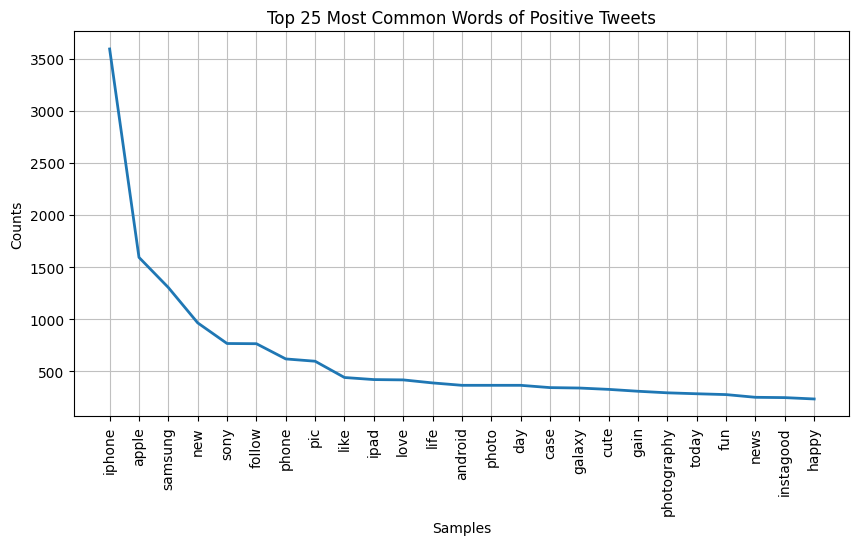

In [49]:
#Creating a python list of all words from all the positive tweets
positive_vocab=[token for tweet in positive_tweets.cleaned_tweets_without_stopwords for token in tweet.split() ]

#Frequency distribution of the words
positive_freq=nltk.FreqDist(positive_vocab)
plt.figure(figsize=(10,5))
plt.title("Top 25 Most Common Words of Positive Tweets")
positive_freq.plot(25,cumulative=False)
plt.show()

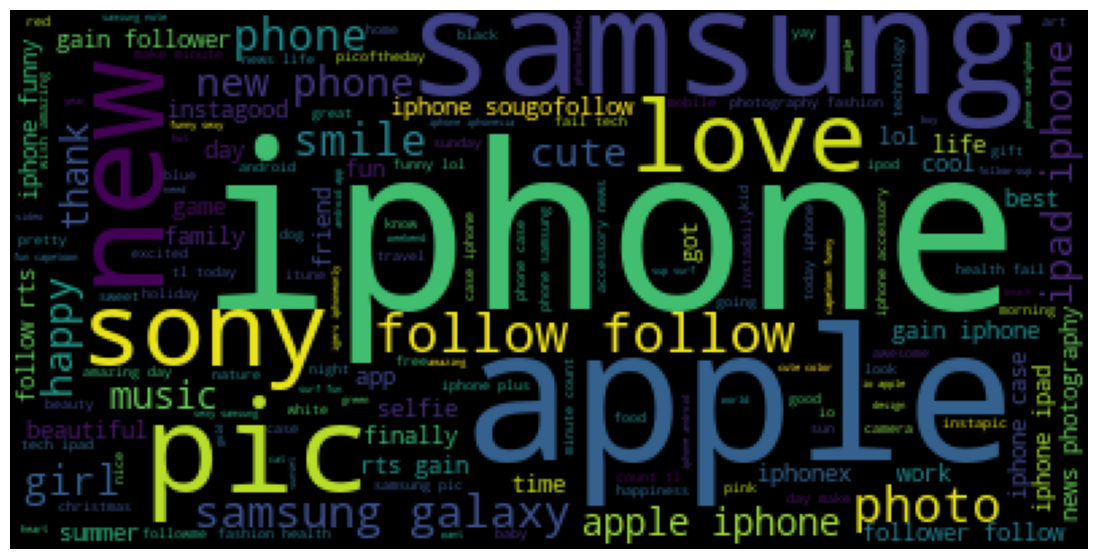

In [50]:
# WordCloud for Positive tweets
# Python program to convert a list to string using list comprehension using list comprehension
p_vocab = ' '.join(map(str, positive_vocab))
positive_wordcloud = WordCloud()

positive_wordcloud.generate(p_vocab)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(positive_wordcloud)
plt.show()

In [51]:
#Freq Dist for Negaitive comments
negative_tweets = tweets[tweets.label==0]
negative_tweets.head(5)

label  \
4       0   
5       0   
10      0   
11      0   
12      0   

                                                                                                                           tweet  \
4   What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   
5                                                              iPhone software update fucked up my phone big time Stupid iPhones   
10  hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.   
11    Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade   
12          Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo   

                                                                                                cleaned_tweets  \
4   what amazing service apple will not even talk about question have unless pay them for their stupid support   
5                                                  iphone software update fucked phone big time stupid iphones   
10    hey apple when you make new ipod not make new color inch thinner make not crash every five fuckin minite   
11            not heavy machinery but doe what need really dropped the ball with that design drinkyourhaterade   
12      contemplating giving the iphone bandwagon simply because cellcom ha new android depressing idontwantto   

                                                           cleaned_tweets_without_stopwords  
4                             amazing service apple talk question unless pay stupid support  
5                               iphone software update fucked phone big time stupid iphones  
10             hey apple make new ipod make new color inch thinner make crash fuckin minite  
11                        heavy machinery need really dropped ball design drinkyourhaterade  
12  contemplating giving iphone bandwagon simply cellcom new android depressing idontwantto

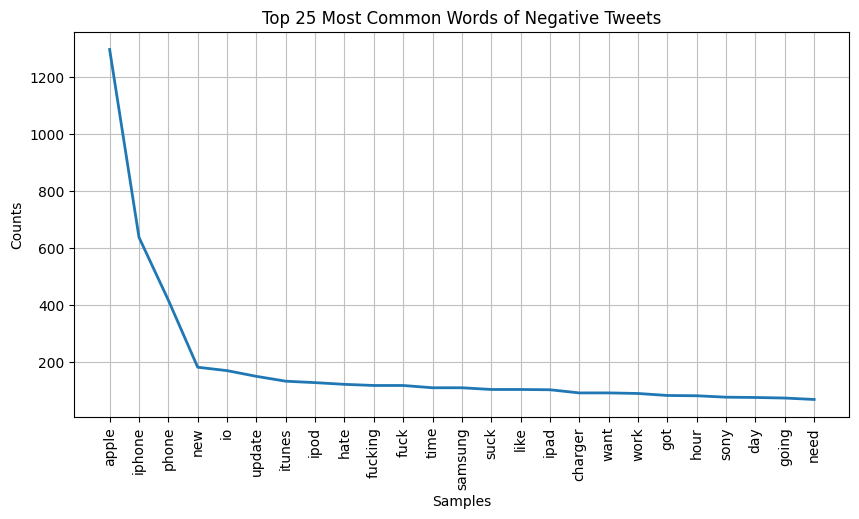

In [52]:
#Creating a python list of all words from all the Negative tweets
negative_vocab=[token for tweet in negative_tweets.cleaned_tweets_without_stopwords for token in tweet.split() ]

#Frequency distribution of the words
negative_freq=nltk.FreqDist(negative_vocab)
plt.figure(figsize=(10,5))
plt.title("Top 25 Most Common Words of Negative Tweets")
negative_freq.plot(25,cumulative=False)
plt.show()


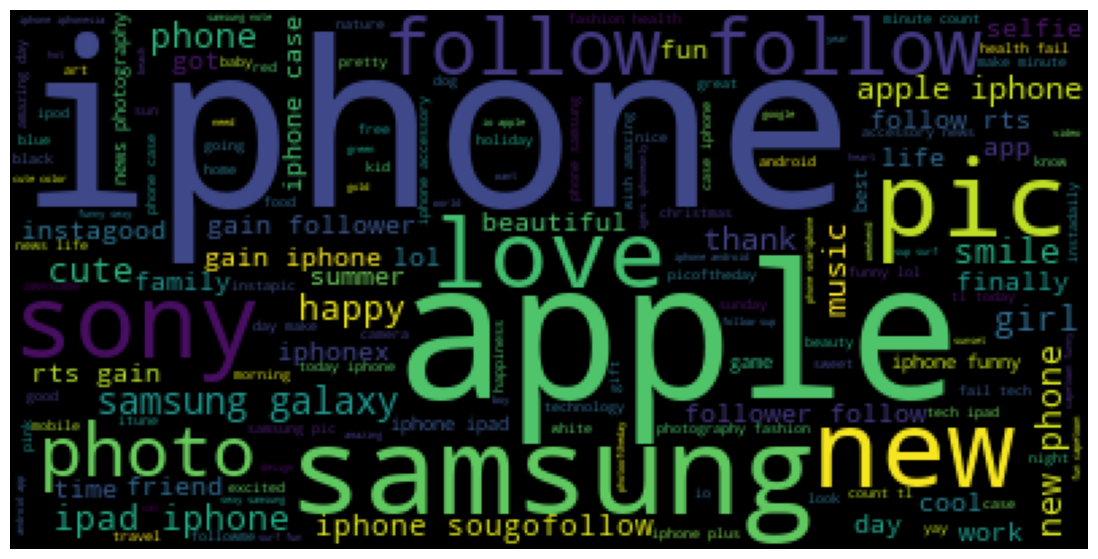

In [53]:
# WordCloud for Positive tweets
# Python program to convert a list to string using list comprehension using list comprehension
p_vocab =' '.join(map(str, positive_vocab))
positive_wordcloud=WordCloud()
positive_wordcloud.generate(p_vocab)
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(positive_wordcloud)
plt.show()

In [54]:
# X = ["I love cooking", "I cooked bad pasta today" ]
X = [[1,2,3,0,0], [1,2,3,4,5]]
y = [1, 0]

from sklearn.svm import SVC
svc = SVC()
svc.fit(X, y)

SVC()

## 5. Feature Extraction: Bag of Words Model

Basically, we have to convert our unstructured dataset into a structured one!

We are going to "Vectorize", i.e. convert the cleaned txt documents TO vector of  FIXED LENGTH!!

(vector means >>> list/array of numbers)
(a single number >>> scaler)

Can be done using 2 Techniques:
- **Bag of Words Model**: "binary", "count", "tfidf", "freq" >>> FIXED LENGTH is the no. of words in the vocab.
- **Word Embedding Models**: Word2Vec (Skipgram, CBOW), GloVe, fastText, Doc2Vec, ELMo   >>> FIXED LENGTH corresponds the size of word embedding.

Size of the Vocab will determine the size of "features"!! (in most basic sense, each word of the vocab IS/CAN BE considered as a feature!)

This Vocab will be used to make your Corpus structured!! (N no. of documents x m no. of words) >> "Document-Term Matrix"

In [15]:
X = tweets['cleaned_tweets']
y = tweets['label']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
CV_train = CV.fit_transform(X_train)
CV_test = CV.transform(X_test)

In [18]:
CV_train.shape  # 12891 unique words in the vocab created by using the X_train

(5940, 12891)

In [19]:
CV_test.shape   # the number of features match in the test set

(1980, 12891)

In [20]:
X_train.iloc[0]   # The actual 1st tweet

'like book displayed oak grain book case though wrong'

In [21]:
len(set(X_train.iloc[0].split())) # there are 8 unique words in the 1st tweet

8

In [22]:
CV_train[0]   # features of the 1st tweet

<1x12891 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [23]:
12891 - 8   # this is the number of zeros in the 1st row (1st document vector)

12883

In [24]:
type(CV_train[0])  # datatype of the features

scipy.sparse._csr.csr_matrix

In [25]:
CV_train[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
import sys
print(sys.getsizeof(CV_train[0]) ) # 48 bytes 
print(sys.getsizeof(CV_train[0].todense())) # 152 bytes 

48
152


In [27]:
df = pd.DataFrame(CV_train.todense(), columns=CV.get_feature_names_out())
df.head(15)  # printing the 1st 15 rows of the Document-Term Matrix

aag  aah  aalborg  aand  aapl  aaron  aarp  aarrrggghhhh  aashamsakal  \
0     0    0        0     0     0      0     0             0            0   
1     0    0        0     0     0      0     0             0            0   
2     0    0        0     0     0      0     0             0            0   
3     0    0        0     0     0      0     0             0            0   
4     0    0        0     0     0      0     0             0            0   
5     0    0        0     0     0      0     0             0            0   
6     0    0        0     0     0      0     0             0            0   
7     0    0        0     0     0      0     0             0            0   
8     0    0        0     0     0      0     0             0            0   
9     0    0        0     0     0      0     0             0            0   
10    0    0        0     0     0      0     0             0            0   
11    0    0        0     0     0      0     0             0            0   
12    0    0        0     0     0      0     0             0            0   
13    0    0        0     0     0      0     0             0            0   
14    0    0        0     0     0      0     0             0            0   

    aaydojbfkq  ...  zune  zunehd  zunjndm  zurich  zwckahsl  zwcn  zxw  \
0            0  ...     0       0        0       0         0     0    0   
1            0  ...     0       0        0       0         0     0    0   
2            0  ...     0       0        0       0         0     0    0   
3            0  ...     0       0        0       0         0     0    0   
4            0  ...     0       0        0       0         0     0    0   
5            0  ...     0       0        0       0         0     0    0   
6            0  ...     0       0        0       0         0     0    0   
7            0  ...     0       0        0       0         0     0    0   
8            0  ...     0       0        0       0         0     0    0   
9            0  ...     0       0        0       0         0     0    0   
10           0  ...     0       0        0       0         0     0    0   
11           0  ...     0       0        0       0         0     0    0   
12           0  ...     0       0        0       0         0     0    0   
13           0  ...     0       0        0       0         0     0    0   
14           0  ...     0       0        0       0         0     0    0   

    zzita  zzjvgtyaxl  zznj  
0       0           0     0  
1       0           0     0  
2       0           0     0  
3       0           0     0  
4       0           0     0  
5       0           0     0  
6       0           0     0  
7       0           0     0  
8       0           0     0  
9       0           0     0  
10      0           0     0  
11      0           0     0  
12      0           0     0  
13      0           0     0  
14      0           0     0  

[15 rows x 12891 columns]

In [28]:
df.size  # the total number of elements in the entire dataframe

76572540

In [29]:
df.size/1e6  # 76.57 million values are present in this dataframe

76.57254

In [30]:
import numpy as np
np.count_nonzero(df) # this is count of non-zero elements in the entire dataframe!!!!!!

75390

In [31]:
100*np.count_nonzero(df)/df.size # percentage of the non-zero elements in the DF

0.09845566047567444

In [32]:
print(CV.get_feature_names_out()[:50])  # 1st 50 feature names in ALphabetical order

['aag' 'aah' 'aalborg' 'aand' 'aapl' 'aaron' 'aarp' 'aarrrggghhhh'
 'aashamsakal' 'aaydojbfkq' 'aayp' 'ab' 'abah' 'abay' 'abb' 'abc' 'abe'
 'aber' 'abercrombie' 'abi' 'ability' 'abit' 'able' 'ableton' 'aboard'
 'about' 'aboutalook' 'abouttime' 'abouttonight' 'above' 'abp' 'abscbn'
 'absence' 'absolute' 'absolutely' 'absurd' 'abu' 'abudhabi' 'abuja'
 'abujacity' 'abujafct' 'abujapeople' 'abujaphones' 'abukamalyasinpic'
 'abuse' 'academia' 'academy' 'acap' 'acc' 'accelerate']


In [33]:
len(CV.get_feature_names_out())

12891

## 6. Actual model building

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')

LR.fit(CV_train, y_train)

LogisticRegression(solver='liblinear')

In [35]:
LR.score(CV_train, y_train) # train score

0.9750841750841751

In [36]:
LR.score(CV_test, y_test)   # test score

0.8858585858585859

#### prediction for a randomly generated tweet

In [37]:
test_tweet = np.random.choice([0, 1], size=(1, 12891))
test_tweet

array([[1, 1, 0, ..., 0, 1, 0]])

In [38]:
CV.inverse_transform(test_tweet)  # fetching the actual words in the tweet

[array(['aag', 'aah', 'aand', ..., 'zwckahsl', 'zxw', 'zzjvgtyaxl'],
       dtype='<U37')]

In [39]:
LR.predict(test_tweet)

array([1], dtype=int64)

In [40]:
test_twt = """new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc"""

In [41]:
test_twt

'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc'

In [42]:
test_twt1 = CV.transform([test_twt])
test_twt1.shape

(1, 12891)

In [43]:
LR.predict(test_twt1)

array([1], dtype=int64)

## TF-IDF Logistic Model

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF = TfidfVectorizer()
TFIDF_train = TFIDF.fit_transform(X_train)
TFIDF_test = TFIDF.transform(X_test)

In [45]:
TFIDF_train.shape

(5940, 12891)

In [46]:
type(TFIDF_train)

scipy.sparse._csr.csr_matrix

In [47]:
LR = LogisticRegression(solver='liblinear')
LR.fit(TFIDF_train, y_train)

LogisticRegression(solver='liblinear')

In [48]:
LR.score(TFIDF_train, y_train) # train score

0.9168350168350168

In [49]:
LR.score(TFIDF_test, y_test)   # test score

0.8787878787878788

### Model building taking account of the Class imbalance

In [50]:
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2')
LR.fit(TFIDF_train, y_train)
print('Train Score:', LR.score(TFIDF_train, y_train))   # train score
print('Test Score: ', LR.score(TFIDF_test, y_test) )  # test score

Train Score: 0.9260942760942761
Test Score:  0.8813131313131313


In [51]:
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l1')
LR.fit(TFIDF_train, y_train)
print('Train Score:', LR.score(TFIDF_train, y_train))   # train score
print('Test Score: ', LR.score(TFIDF_test, y_test) )  # test score

Train Score: 0.8974747474747474
Test Score:  0.8747474747474747


In [52]:
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l1', C=2)
LR.fit(TFIDF_train, y_train)
print('Train Score:', LR.score(TFIDF_train, y_train))   # train score
print('Test Score: ', LR.score(TFIDF_test, y_test) )  # test score

Train Score: 0.9255892255892256
Test Score:  0.8838383838383839


In [53]:
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l1', C=0.5)
LR.fit(TFIDF_train, y_train)
print('Train Score:', LR.score(TFIDF_train, y_train))   # train score
print('Test Score: ', LR.score(TFIDF_test, y_test) )  # test score

Train Score: 0.8779461279461279
Test Score:  0.8641414141414141


## Crossvalidating LR Model

### Comparing L2 vs L1

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

TFIDF = TfidfVectorizer()
TFIDF_features = TFIDF.fit_transform(X)

n_splits = 5
kfold = StratifiedKFold(n_splits, shuffle=True, random_state=42)

In [55]:
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)
results = cross_val_score(LR, TFIDF_features, y, scoring='accuracy', cv=kfold)
print(results)
print(results.mean().round(4), results.std().round(4))

[0.87941919 0.8844697  0.87941919 0.8895202  0.88573232]
0.8837 0.0039


In [56]:
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l1', C=0.5)
results = cross_val_score(LR, TFIDF_features, y, scoring='accuracy', cv=kfold)
print(results)
print(results.mean().round(4), results.std().round(4))

[0.87247475 0.85858586 0.8604798  0.87941919 0.87247475]
0.8687 0.0079


### Same comparison between L1 vs L2,... using the cross_validate function

In [57]:
from sklearn.model_selection import cross_validate

LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)
results = cross_validate(LR, TFIDF_features, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True)

print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))

0.9097 0.0012
0.8837 0.0039


In [58]:
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l1', C=0.5)
results = cross_validate(LR, TFIDF_features, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True)

print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))

0.8789 0.002
0.8687 0.0079


### Compare TF_IDF vs CountVectorizer using cross_validate

In [59]:
CV = CountVectorizer()
CV_features = CV.fit_transform(X)

LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)
results = cross_validate(LR, CV_features, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True)

print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))

0.9509 0.0013
0.8914 0.0066


In [60]:
TFIDF = TfidfVectorizer()
TFIDF_features = TFIDF.fit_transform(X)

LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)
results = cross_validate(LR, TFIDF_features, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)

print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))

0.9097 0.0012
0.8837 0.0039


In [61]:
results['test_score']

array([0.87941919, 0.8844697 , 0.87941919, 0.8895202 , 0.88573232])

In [62]:
results['estimator'][3].coef_   # coeff for LR model which had the highest test accuracy !!

array([[ 0.02753796,  0.01264809, -0.14983517, ...,  0.02689598,
         0.0210671 ,  0.        ]])

In [63]:
results['estimator'][3].n_features_in_   # total number of features

15572

## Let's experiment more on the Features!!!

In [64]:
CV = CountVectorizer(max_df=0.5, min_df=1, max_features=None)
CV_features = CV.fit_transform(X)

LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)
results = cross_validate(LR, CV_features, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)

print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))
print("Number of features:", results['estimator'][3].n_features_in_)

0.9509 0.0013
0.8914 0.0066
Number of features: 15572


In [65]:
CV = CountVectorizer(max_df=0.5, min_df=10, max_features=None)
CV_features = CV.fit_transform(X)

LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)
results = cross_validate(LR, CV_features, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)

print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))
print("Number of features:", results['estimator'][3].n_features_in_)

0.9188 0.0012
0.8861 0.0063
Number of features: 1208


In [66]:
CV = CountVectorizer(max_df=0.5, min_df=10, max_features=None)
CV_features = CV.fit_transform(X)

LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l1', C=0.5)
results = cross_validate(LR, CV_features, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)

print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))
print("Number of features:", results['estimator'][3].n_features_in_)

0.9046 0.0005
0.8826 0.0032
Number of features: 1208


In [67]:
TFIDF = TfidfVectorizer(max_df=0.5, min_df=10, max_features=None)
TFIDF_features = TFIDF.fit_transform(X)

LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)
results = cross_validate(LR, TFIDF_features, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)

print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))
print("Number of features:", results['estimator'][3].n_features_in_)

0.8965 0.0013
0.8803 0.0063
Number of features: 1208


In [68]:
TFIDF = TfidfVectorizer(max_df=0.5, min_df=10, max_features=None)
TFIDF_features = TFIDF.fit_transform(X)

LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l1', C=0.5)
results = cross_validate(LR, TFIDF_features, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)

print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))
print("Number of features:", results['estimator'][3].n_features_in_)

0.8842 0.0014
0.8725 0.007
Number of features: 1208


## REducing Features EVen more !!!

In [69]:
# we want to include only those words in the vocab which have min df of 10,
# means select only those words which occur ATLEAST in 10 documents!! 
# Exclude All those words which occure in more than 50% of the documents (max_df=0.5)
# AND SELECT the TOP 300 FEATURES ONLY to build the model

CV = CountVectorizer(max_df=0.5, min_df=10, max_features=300)
CV_features = CV.fit_transform(X)

LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)
results = cross_validate(LR, CV_features, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)

print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))
print("Number of features:", results['estimator'][3].n_features_in_)

0.889 0.0019
0.8783 0.0062
Number of features: 300


In [70]:
TFIDF = TfidfVectorizer(max_df=0.5, min_df=10, max_features=300)
TFIDF_features = TFIDF.fit_transform(X)

LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)
results = cross_validate(LR, TFIDF_features, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)

print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))
print("Number of features:", results['estimator'][3].n_features_in_)

0.8807 0.0013
0.8715 0.0046
Number of features: 300


In [71]:
print(CV.get_feature_names_out())  # printing the 300 features above

['about' 'accessory' 'after' 'again' 'all' 'always' 'amazing' 'amazon'
 'and' 'android' 'another' 'any' 'app' 'apple' 'apps' 'appstore' 'are'
 'art' 'awesome' 'baby' 'back' 'battery' 'beach' 'beautiful' 'beauty'
 'because' 'been' 'best' 'better' 'big' 'birthday' 'black' 'blackberry'
 'blue' 'book' 'bought' 'boy' 'but' 'buy' 'camera' 'can' 'cannot'
 'capetown' 'case' 'cat' 'charger' 'check' 'christmas' 'color' 'com'
 'come' 'computer' 'cool' 'could' 'count' 'cover' 'customer' 'cute' 'day'
 'deal' 'design' 'did' 'doe' 'dog' 'download' 'even' 'ever' 'every'
 'everyone' 'everything' 'excited' 'facebook' 'fail' 'family' 'fashion'
 'finally' 'first' 'flower' 'follow' 'followback' 'follower' 'followme'
 'food' 'for' 'free' 'friday' 'friend' 'from' 'fuck' 'fucking' 'fuckyou'
 'fun' 'funny' 'gadget' 'gain' 'galaxy' 'game' 'gaming' 'get' 'getting'
 'gift' 'girl' 'going' 'gold' 'good' 'google' 'got' 'great' 'green' 'guy'
 'ha' 'had' 'happiness' 'happy' 'hate' 'have' 'headphone' 'health' 'hello'
 

# Model Building using Pipeline

In [72]:
from sklearn.pipeline import Pipeline

TFIDF = TfidfVectorizer(max_df=0.5, min_df=10, max_features=300)
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)

TFIDF_pipeline = Pipeline([("TFIDF", TFIDF), ("LR", LR)])

results = cross_validate(TFIDF_pipeline, X, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)
print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))

0.8807 0.0016
0.8716 0.0052


In [260]:
results['estimator'][0]  # fisrt pipeline

Pipeline(steps=[('TFIDF',
                 TfidfVectorizer(max_df=0.5, max_features=300, min_df=10)),
                ('LR',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    solver='liblinear'))])

In [261]:
results['estimator'][0].steps

[('TFIDF', TfidfVectorizer(max_df=0.5, max_features=300, min_df=10)),
 ('LR',
  LogisticRegression(C=0.5, class_weight='balanced', solver='liblinear'))]

In [263]:
results['estimator'][0].named_steps['LR']  # extracting my Logistic Reg. model from the pipeline

LogisticRegression(C=0.5, class_weight='balanced', solver='liblinear')

In [266]:
results['estimator'][0].named_steps['LR'].n_features_in_ # number of features

300

In [267]:
results['estimator'][0].named_steps['LR'].coef_ # model coefficients

array([[-0.80975503,  0.72675888, -0.76500827, -1.58356702, -1.23841572,
        -0.07422423,  1.45863908,  0.73661617, -1.26219614,  0.76142176,
        -0.39189791, -0.54664204,  1.11081046, -1.97175707, -0.48396807,
         0.8842521 , -0.7615731 ,  1.0468492 ,  1.22992716,  1.12526266,
        -0.1293482 , -1.66741091,  1.52012074,  1.0749511 , -1.96877714,
        -0.51191428,  1.21290347, -0.22740519, -0.52093163,  1.88319268,
         0.48633939, -0.25481788,  0.80210558, -0.09436032,  0.1532429 ,
         0.54826582, -1.51042993,  0.0496767 ,  0.15825512, -0.83033759,
        -2.16357665,  0.12076919,  2.12232075,  0.4659698 , -1.91668388,
         0.5128828 ,  1.05805858,  0.61257018,  2.34920742, -0.04954366,
        -0.52485679,  0.41649113, -0.57641979,  0.54889241,  0.62431254,
        -0.56401342,  2.21070177,  0.75143697,  0.36890104,  0.609697  ,
        -0.4962309 , -0.89021442,  0.93386889, -0.60510821, -0.06906403,
        -0.28878014, -1.0282898 ,  0.07656305, -1.1

# HyperParam Tuning 

In [275]:
C_values = np.arange(0.0, 1.05, 0.05)
C_values

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [297]:
# We'll tune the "C" of L2 -penalty
from sklearn.model_selection import GridSearchCV

TFIDF = TfidfVectorizer(max_df=0.5, min_df=10, max_features=None)  # 1208
TFIDF_features = TFIDF.fit_transform(X)

LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2')

C_values = np.arange(0.0, 1.05, 0.05).round(2)
C_values[0] = 0.000001

grid = GridSearchCV(estimator=LR, param_grid={"C":C_values}, scoring='accuracy', \
                            cv=kfold, verbose=2, return_train_score=True, n_jobs=-1)


grid_results = grid.fit(TFIDF_features, y)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [298]:
print(grid_results)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0e-06, 5.0e-02, 1.0e-01, 1.5e-01, 2.0e-01, 2.5e-01, 3.0e-01,
       3.5e-01, 4.0e-01, 4.5e-01, 5.0e-01, 5.5e-01, 6.0e-01, 6.5e-01,
       7.0e-01, 7.5e-01, 8.0e-01, 8.5e-01, 9.0e-01, 9.5e-01, 1.0e+00])},
             return_train_score=True, scoring='accuracy', verbose=2)


In [299]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 1.0}, 0.8837121212121211, 20)

In [301]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [302]:
grid_results.cv_results_['mean_test_score']  # mean test scores of all the 21 param values

array([0.77550505, 0.86641414, 0.87108586, 0.87474747, 0.8770202 ,
       0.87739899, 0.87891414, 0.8790404 , 0.87941919, 0.87979798,
       0.88030303, 0.88042929, 0.88156566, 0.88194444, 0.88270202,
       0.88244949, 0.88244949, 0.88295455, 0.88320707, 0.88320707,
       0.88371212])

In [303]:
# test accuracy of THE BEST MODEL
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]

0.8837121212121211

In [311]:
grid_results.cv_results_['mean_test_score']

array([0.77550505, 0.86641414, 0.87108586, 0.87474747, 0.8770202 ,
       0.87739899, 0.87891414, 0.8790404 , 0.87941919, 0.87979798,
       0.88030303, 0.88042929, 0.88156566, 0.88194444, 0.88270202,
       0.88244949, 0.88244949, 0.88295455, 0.88320707, 0.88320707,
       0.88371212])

In [313]:
for k, val in enumerate(C_values):
    print(val, "\t", grid_results.cv_results_['mean_train_score'][k].round(4), '\t', \
          grid_results.cv_results_['mean_test_score'][k].round(4)) 

1e-06 	 0.7784 	 0.7755
0.05 	 0.872 	 0.8664
0.1 	 0.8783 	 0.8711
0.15 	 0.8824 	 0.8747
0.2 	 0.8854 	 0.877
0.25 	 0.8882 	 0.8774
0.3 	 0.8902 	 0.8789
0.35 	 0.8919 	 0.879
0.4 	 0.8935 	 0.8794
0.45 	 0.8954 	 0.8798
0.5 	 0.8965 	 0.8803
0.55 	 0.8979 	 0.8804
0.6 	 0.8991 	 0.8816
0.65 	 0.9002 	 0.8819
0.7 	 0.9015 	 0.8827
0.75 	 0.9023 	 0.8824
0.8 	 0.9027 	 0.8824
0.85 	 0.9039 	 0.883
0.9 	 0.9049 	 0.8832
0.95 	 0.9056 	 0.8832
1.0 	 0.9061 	 0.8837


# Hyperpram Tuning using Pipelines

In [315]:
TFIDF_pipeline.named_steps

{'TFIDF': TfidfVectorizer(max_df=0.5, max_features=300, min_df=10),
 'LR': LogisticRegression(C=0.5, class_weight='balanced', solver='liblinear')}

In [319]:
# We'll tune the "C" of L2 -penalty

TFIDF = TfidfVectorizer(max_df=0.5, min_df=10, max_features=None)
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2')

TFIDF_pipeline = Pipeline([("TFIDF", TFIDF), ("LR", LR)])

C_values = np.arange(0.0, 1.05, 0.05).round(2)
C_values[0] = 0.000001

param_grid = {"LR__C": C_values}

grid = GridSearchCV(estimator=TFIDF_pipeline, param_grid=param_grid, scoring='accuracy', \
                            cv=kfold, verbose=2, return_train_score=True, n_jobs=-1)


grid_results = grid.fit(X, y)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [320]:
for k, val in enumerate(C_values):
    print(val, "\t", grid_results.cv_results_['mean_train_score'][k].round(4), '\t', \
          grid_results.cv_results_['mean_test_score'][k].round(4)) 

1e-06 	 0.7789 	 0.7754
0.05 	 0.8705 	 0.8639
0.1 	 0.8769 	 0.8698
0.15 	 0.8804 	 0.8718
0.2 	 0.8841 	 0.874
0.25 	 0.8865 	 0.8764
0.3 	 0.8883 	 0.877
0.35 	 0.8907 	 0.8782
0.4 	 0.8925 	 0.8785
0.45 	 0.8943 	 0.8792
0.5 	 0.8955 	 0.8806
0.55 	 0.8969 	 0.8808
0.6 	 0.8978 	 0.8807
0.65 	 0.8988 	 0.8813
0.7 	 0.8997 	 0.8813
0.75 	 0.9008 	 0.8818
0.8 	 0.9014 	 0.8819
0.85 	 0.9021 	 0.8818
0.9 	 0.9027 	 0.8822
0.95 	 0.9033 	 0.8823
1.0 	 0.904 	 0.8828


# Model excluding the Stopwords

In [322]:
X1 = tweets['cleaned_tweets_without_stopwords']
y = tweets['label']

In [323]:
TFIDF = TfidfVectorizer(max_df=0.5, min_df=10, max_features=300)
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)

TFIDF_pipeline = Pipeline([("TFIDF", TFIDF), ("LR", LR)])

results = cross_validate(TFIDF_pipeline, X1, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)
print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))

0.8691 0.0025
0.8554 0.0109


# Model Building using N-Gram Features

In [28]:
# Unigram Model : Token are single words 
TFIDF = TfidfVectorizer(ngram_range=(1, 1), max_df=0.5, min_df=10, max_features=None)
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)

TFIDF_pipeline = Pipeline([("TFIDF", TFIDF), ("LR", LR)])

results = cross_validate(TFIDF_pipeline, X, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)
print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))
print("Number of features:", results['estimator'][0].named_steps['LR'].n_features_in_) # number of features)

0.8955 0.0017
0.8806 0.0056
Number of features: 998


In [35]:
results['estimator'][0].named_steps['TFIDF'].get_feature_names_out()   
# features included in the vocab.. .hence inputs to the model

array(['able', 'about', 'accessory', 'account', 'actually', 'add',
       'added', 'adorable', 'adventure', 'after', 'again', 'ago', 'air',
       'aliusaexpress', 'all', 'almost', 'already', 'also', 'always',
       'amazing', 'amazon', 'america', 'and', 'android', 'angry',
       'animal', 'annoying', 'another', 'answer', 'any', 'anymore',
       'anyone', 'anything', 'app', 'apparently', 'apple', 'applestore',
       'applesucks', 'appletv', 'applewatch', 'appointment', 'apps',
       'appstore', 'april', 'are', 'arrived', 'art', 'artist', 'asshole',
       'att', 'august', 'available', 'away', 'awesome', 'babe', 'baby',
       'back', 'backup', 'bad', 'banana', 'bar', 'battery', 'bbm',
       'beach', 'beat', 'beautiful', 'beauty', 'because', 'bed', 'been',
       'before', 'being', 'believe', 'best', 'bestfriend', 'bestfriends',
       'bestoftheday', 'bestprice', 'better', 'big', 'bird', 'birthday',
       'bit', 'black', 'blackandwhite', 'blackberry', 'blackfriday',
       'bles

In [36]:
len(results['estimator'][0].named_steps['TFIDF'].get_feature_names_out()   )

998

In [38]:
# Unigram + Bigram Model : Token are single words + word pharases of 2 words
TFIDF = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=10, max_features=None)
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)

TFIDF_pipeline = Pipeline([("TFIDF", TFIDF), ("LR", LR)])

results = cross_validate(TFIDF_pipeline, X, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)
print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))
print("Number of features:", results['estimator'][0].named_steps['LR'].n_features_in_) # number of features)

0.8969 0.001
0.8802 0.0053
Number of features: 1490


In [39]:
1490-998  # 492 ADDITIONAL features , which are Bigram features

492

In [48]:
100*492/998  # 50% increase in the number of features ....

49.298597194388776

In [47]:
# Print only the Bigram features
for token in results['estimator'][0].named_steps['TFIDF'].get_feature_names_out():
    if len(token.split())>1:
        print(token)


about the
accessory news
again apple
aliusaexpress iphone
all contact
all day
all the
all who
amazing day
amazon birthday
amazon home
and apple
and have
and iphone
and not
and now
and samsung
and share
and still
and the
and will
and you
android apps
android game
android iphone
android kindle
android samsung
android window
app for
app iphone
app store
apple and
apple apple
apple for
apple ha
apple io
apple ipad
apple iphone
apple itunes
apple just
apple mac
apple macbook
apple macbookpro
apple new
apple not
apple phone
apple pic
apple pie
apple product
apple samsung
apple store
apple the
apple watch
apple will
apple you
apps beautiful
apps unitedstate
are not
are the
are you
baby samsung
back follow
battery life
beautiful cute
beauty iphone
beauty shopping
bestprice jun
birthday gift
birthday present
birthday sale
blackberry entrepreneur
bot deal
brand new
but the
can you
cannot wait
capetown funny
case for
case iphone
charger for
charm iphone
check out
christmas present
college sororit

In [49]:
# Unigram + Bigram + Trigram Model : Token are single words + word pharases of 2 words
TFIDF = TfidfVectorizer(ngram_range=(1, 3), max_df=0.5, min_df=10, max_features=None)
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)

TFIDF_pipeline = Pipeline([("TFIDF", TFIDF), ("LR", LR)])

results = cross_validate(TFIDF_pipeline, X, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)
print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))
print("Number of features:", results['estimator'][0].named_steps['LR'].n_features_in_) # number of features)

0.8966 0.001
0.8803 0.0053
Number of features: 1682


In [50]:
# Print only the Bigram features
for token in results['estimator'][0].named_steps['TFIDF'].get_feature_names_out():
    if len(token.split())>2:
        print(token)

accessory news life
aliusaexpress iphone io
all who followback
amazing day make
amazon birthday sale
amazon home iphone
and share you
android apps beautiful
android apps unitedstate
android game news
android kindle book
android samsung galaxy
android window nokia
app for iphone
apple ipad iphone
apple iphone iphone
apple iphone plus
apple pic twitter
apps beautiful cute
apps unitedstate cute
back follow everyone
beautiful cute color
beauty shopping aliusaexpress
birthday sale android
bot deal amazon
capetown funny sexy
charm iphone strap
check out here
color igers iphoneonly
count tl today
cute color igers
dating college sorority
day make every
deal amazon home
decor free shop
doe not work
every minute count
everyone who rts
exquisite squishy random
fail tech ipad
fashion health fail
finally got new
follow all who
follow back follow
follow everyone who
follow follow back
follow instagram sup
follow retweet iphone
followback teamfollowback follow
follower this must
followsunday followba

In [51]:
# Dimensionality Reduction 
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=300)

TFIDF = TfidfVectorizer(ngram_range=(1, 1), max_df=0.5, min_df=10, max_features=None)
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.5)

TFIDF_pipeline = Pipeline([("TFIDF", TFIDF), ("SVD", SVD), ("LR", LR)])

results = cross_validate(TFIDF_pipeline, X, y, scoring='accuracy', cv=kfold, \
                         return_train_score=True, return_estimator=True)
print(results['train_score'].mean().round(4), results['train_score'].std().round(4))
print(results['test_score'].mean().round(4), results['test_score'].std().round(4))
print("Number of features:", results['estimator'][0].named_steps['LR'].n_features_in_) # number of features)

0.8846 0.0018
0.8753 0.0052
Number of features: 300
